In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('climate_change_dataset.csv')

In [32]:
data.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [33]:
data.shape

(1000, 10)

In [34]:
data.isnull().sum()

,0
Year,0
Country,0
Avg Temperature (°C),0
CO2 Emissions (Tons/Capita),0
Sea Level Rise (mm),0
Rainfall (mm),0
Population,0
Renewable Energy (%),0
Extreme Weather Events,0
Forest Area (%),0


In [35]:
data.duplicated().sum()

np.int64(0)

In [38]:
print(data.columns)

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')


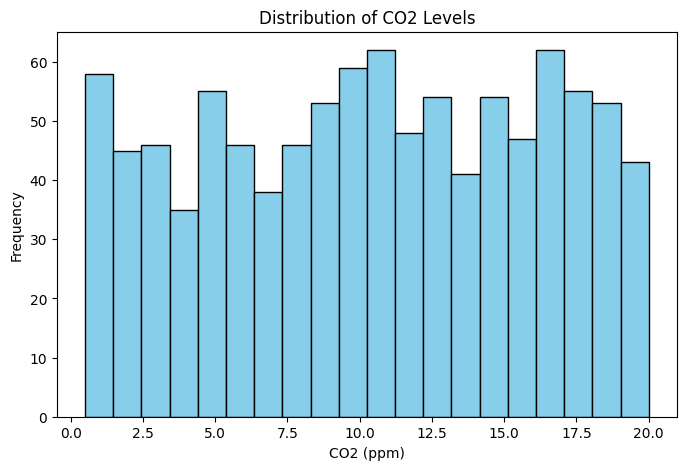

In [42]:
#Histogram — Distribution of CO2 Levels
plt.figure(figsize=(8,5))
plt.hist(data['CO2 Emissions (Tons/Capita)'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of CO2 Levels')
plt.xlabel('CO2 (ppm)')
plt.ylabel('Frequency')
plt.show()


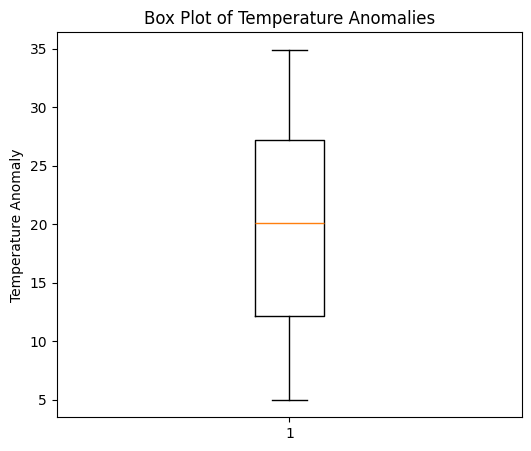

In [43]:
#Box Plot — Outliers in Temperature
plt.figure(figsize=(6,5))
plt.boxplot(data['Avg Temperature (°C)'].dropna())
plt.title('Box Plot of Temperature Anomalies')
plt.ylabel('Temperature Anomaly')
plt.show()

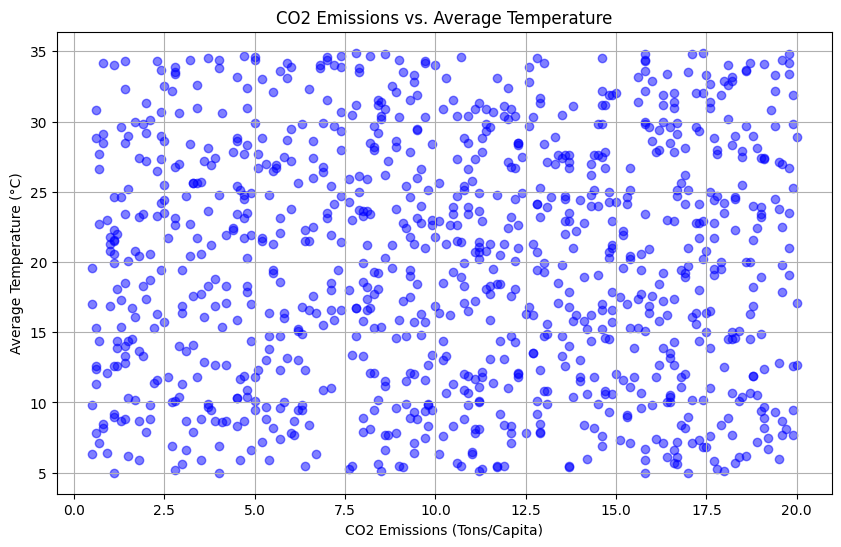

In [47]:
#Scatter Plot: Relationship between two numerical variables (e.g., CO2 Emissions vs. Average Temperature)
plt.figure(figsize=(10, 6))
plt.scatter(data['CO2 Emissions (Tons/Capita)'], data['Avg Temperature (°C)'], c='blue', alpha=0.5)
plt.title('CO2 Emissions vs. Average Temperature')
plt.xlabel('CO2 Emissions (Tons/Capita)')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

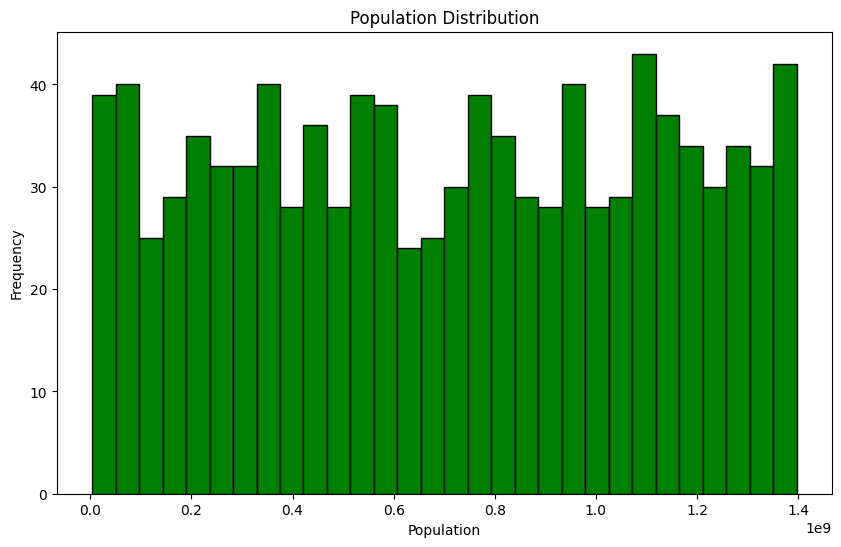

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(data['Population'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

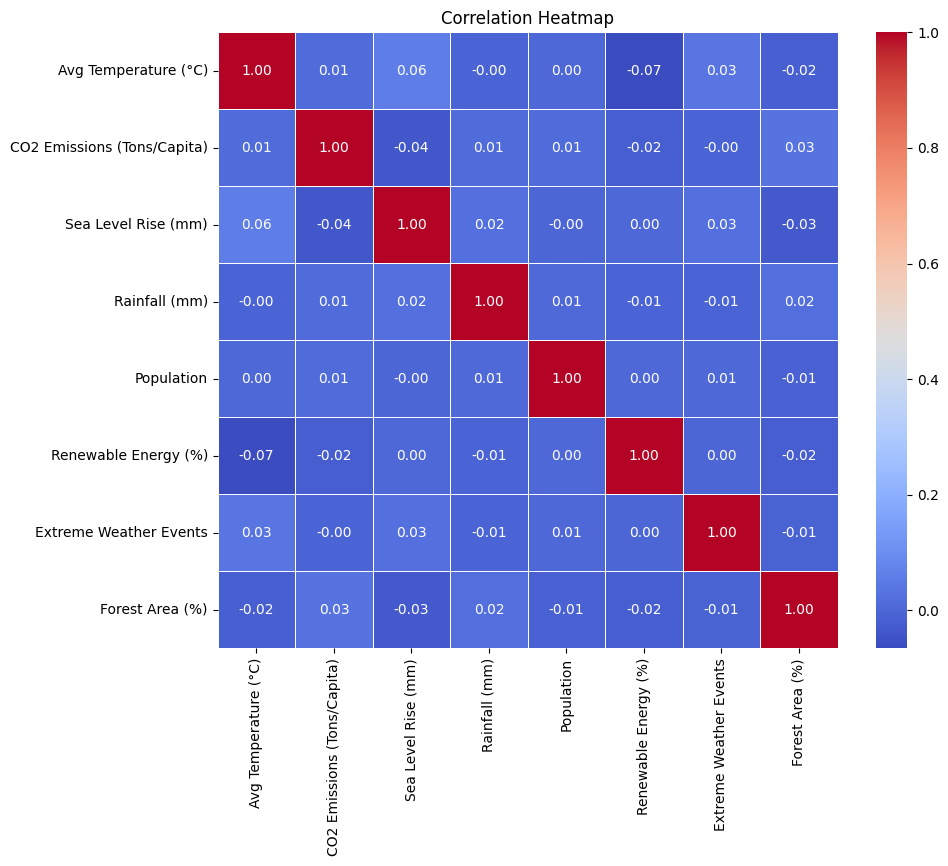

In [51]:
#Heatmap: Correlation between numerical variables
corr = data[['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)',
             'Rainfall (mm)', 'Population', 'Renewable Energy (%)', 'Extreme Weather Events', 'Forest Area (%)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

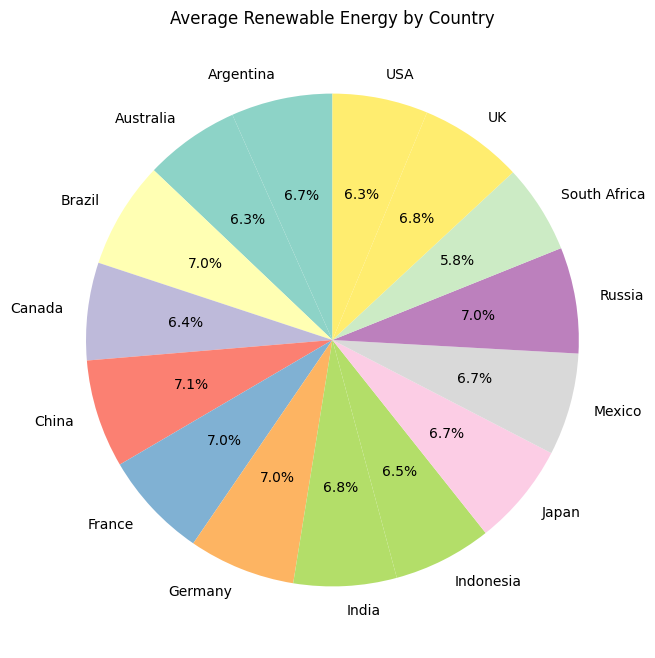

In [53]:
#Pie Chart: Proportion of renewable energy by country or another categorical variable
country_renewable = data.groupby('Country')['Renewable Energy (%)'].mean()
plt.figure(figsize=(8, 8))
country_renewable.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Average Renewable Energy by Country')
plt.ylabel('')  # Remove the y-label
plt.show()

<ipython-input-55-4ee96eb45890>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Country', y='Forest Area (%)', data=data, palette='coolwarm')


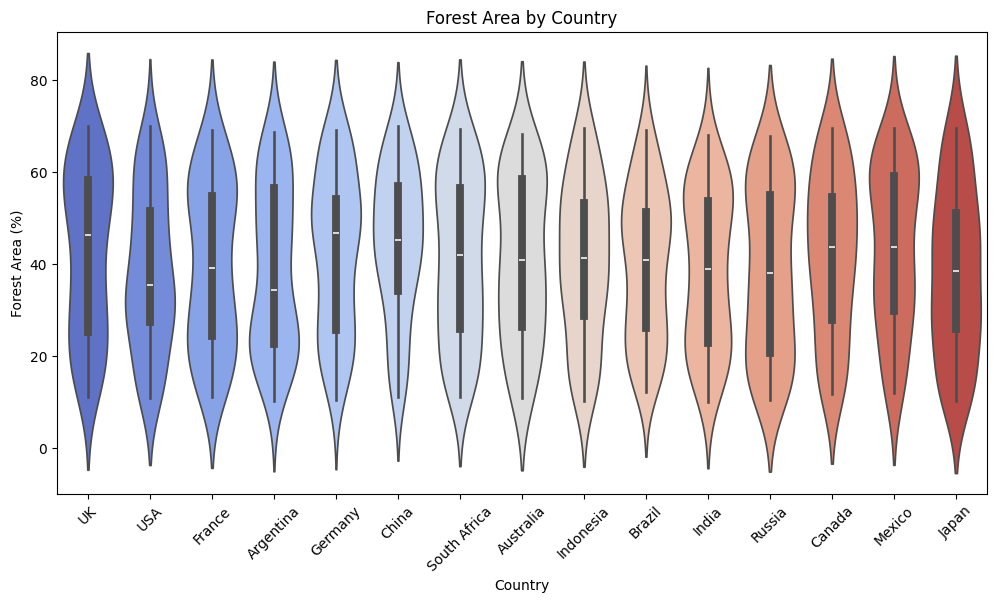

In [55]:
#Violin Plot: Distribution and density of a numerical variable for different categories (e.g., Forest Area by Country)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Country', y='Forest Area (%)', data=data, palette='coolwarm')
plt.title('Forest Area by Country')
plt.xlabel('Country')
plt.ylabel('Forest Area (%)')
plt.xticks(rotation=45)
plt.show()

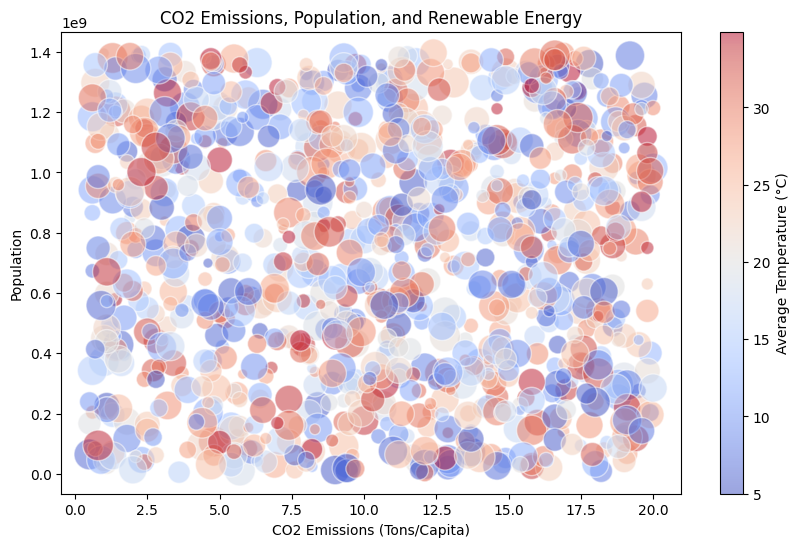

In [57]:
#Bubble Plot: Relationships with three variables (e.g., CO2 Emissions, Population, and Renewable Energy)
plt.figure(figsize=(10, 6))
plt.scatter(data['CO2 Emissions (Tons/Capita)'], data['Population'], s=data['Renewable Energy (%)']*10,
            alpha=0.5, c=data['Avg Temperature (°C)'], cmap='coolwarm', edgecolors='w')
plt.title('CO2 Emissions, Population, and Renewable Energy')
plt.xlabel('CO2 Emissions (Tons/Capita)')
plt.ylabel('Population')
plt.colorbar(label='Average Temperature (°C)')
plt.show()

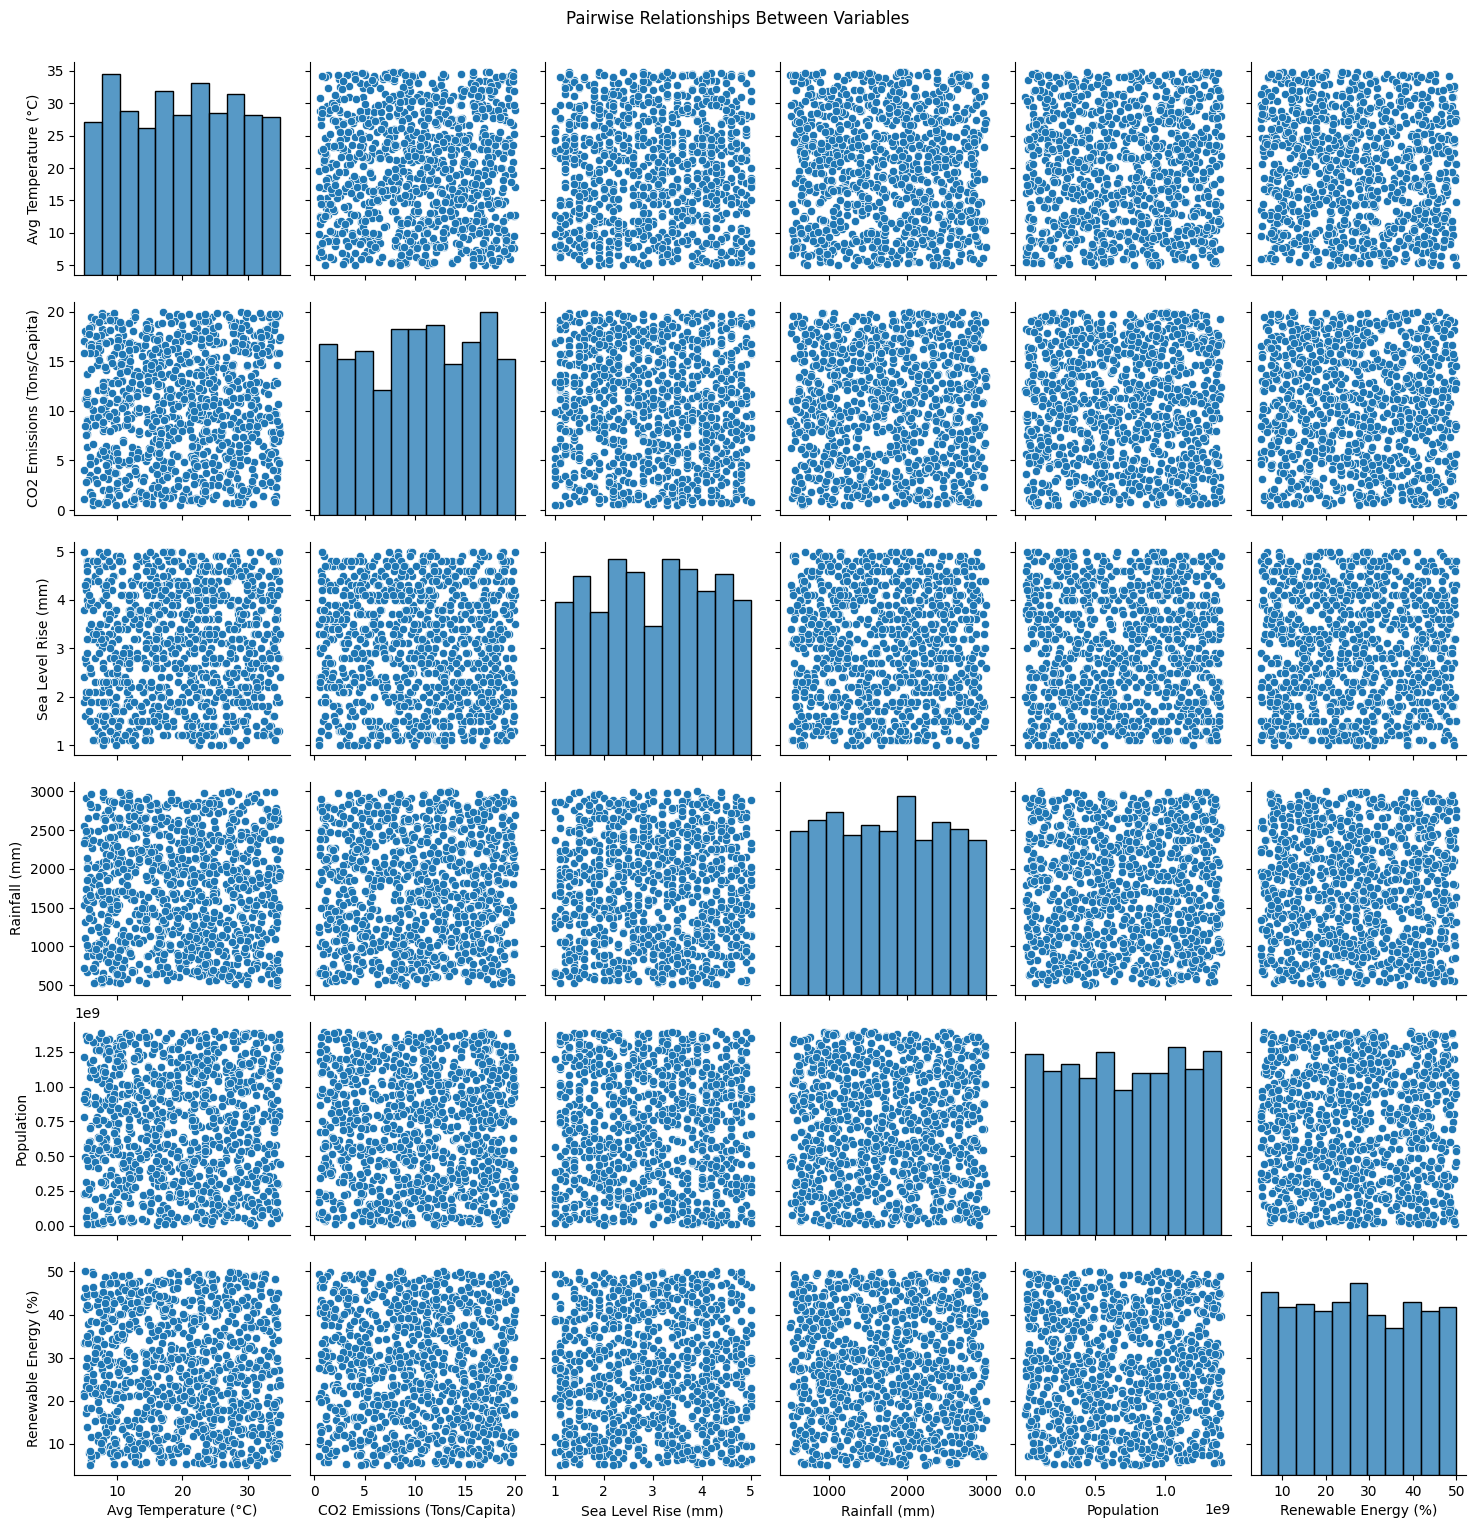

In [58]:
#air Plot: Relationships between several numerical variables
sns.pairplot(data[['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)',
                   'Rainfall (mm)', 'Population', 'Renewable Energy (%)']])
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.show()